In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

Training_url = "cs-training.csv"
training_data = pd.read_csv(Training_url)
print(training_data.describe())
print(training_data.isna().sum())

          Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  150000.000000     150000.000000                         150000.000000   
mean    75000.500000          0.066840                              6.048438   
std     43301.414527          0.249746                            249.755371   
min         1.000000          0.000000                              0.000000   
25%     37500.750000          0.000000                              0.029867   
50%     75000.500000          0.000000                              0.154181   
75%    112500.250000          0.000000                              0.559046   
max    150000.000000          1.000000                          50708.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  150000.000000                         150000.000000  150000.000000   
mean       52.295207                              0.421033     353.005076   
std        14.771866                            

Remove 1 st column

In [3]:
training_data = training_data.iloc[:,1:]

Handling Missing Values

In [4]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan,strategy = "mean")
training_data = imp_mean.fit_transform(training_data)
training_data = pd.DataFrame(training_data,columns = ["SeriousDlqin2yrs","RevolvingUtilizationOfUnsecuredLines","age","NumberOfTime30-59DaysPastDueNotWorse","DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans",
                                            "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"])

Seperating Y_train and X_train

In [5]:
X_data = training_data.iloc[:,1:]
Y_data = training_data.iloc[:,0]

Check for outliers

<AxesSubplot:>

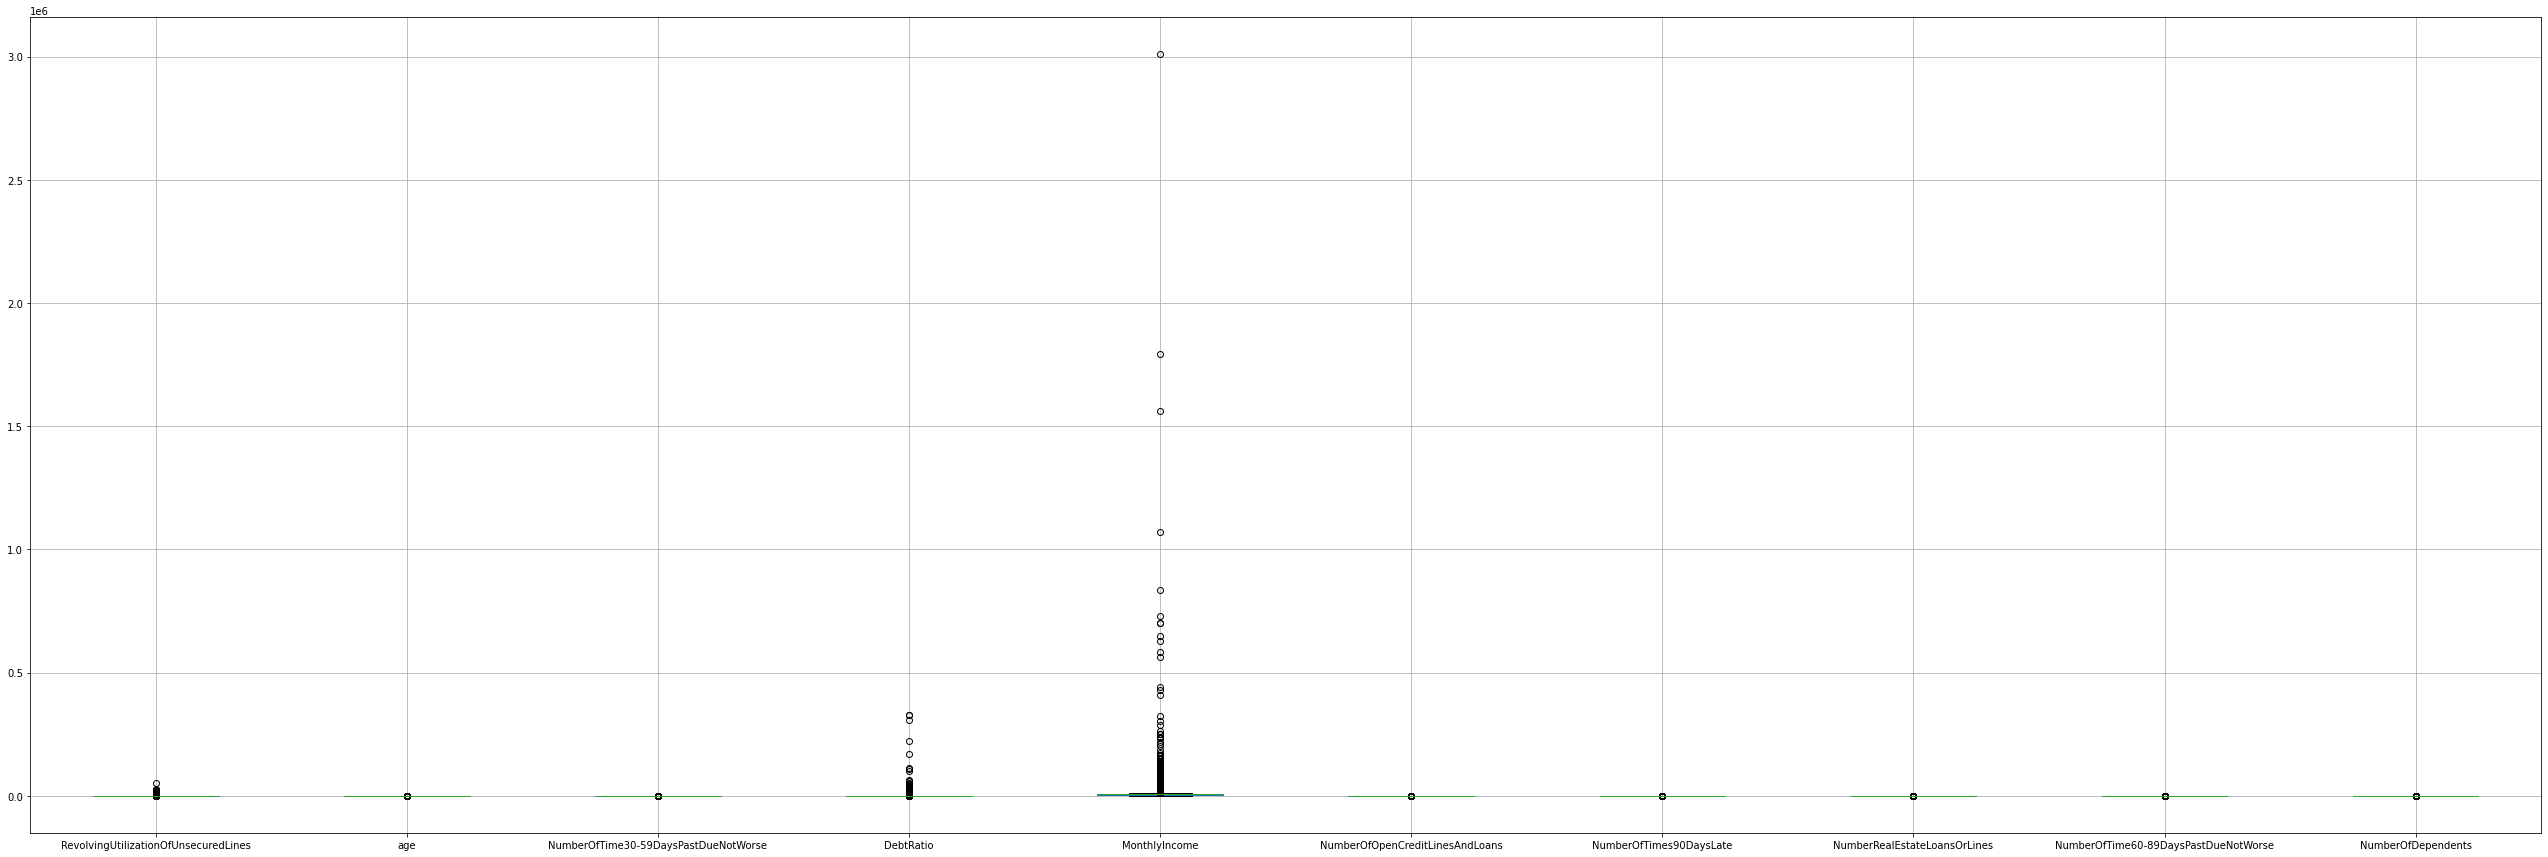

In [6]:
X_data.boxplot(figsize=(45,15))

Fixing outliers

In [7]:
sc = StandardScaler()
X_data = sc.fit_transform(X_data)
X_data = pd.DataFrame(X_data,columns = ["RevolvingUtilizationOfUnsecuredLines","age","NumberOfTime30-59DaysPastDueNotWorse","DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans",
                                            "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"])

<AxesSubplot:>

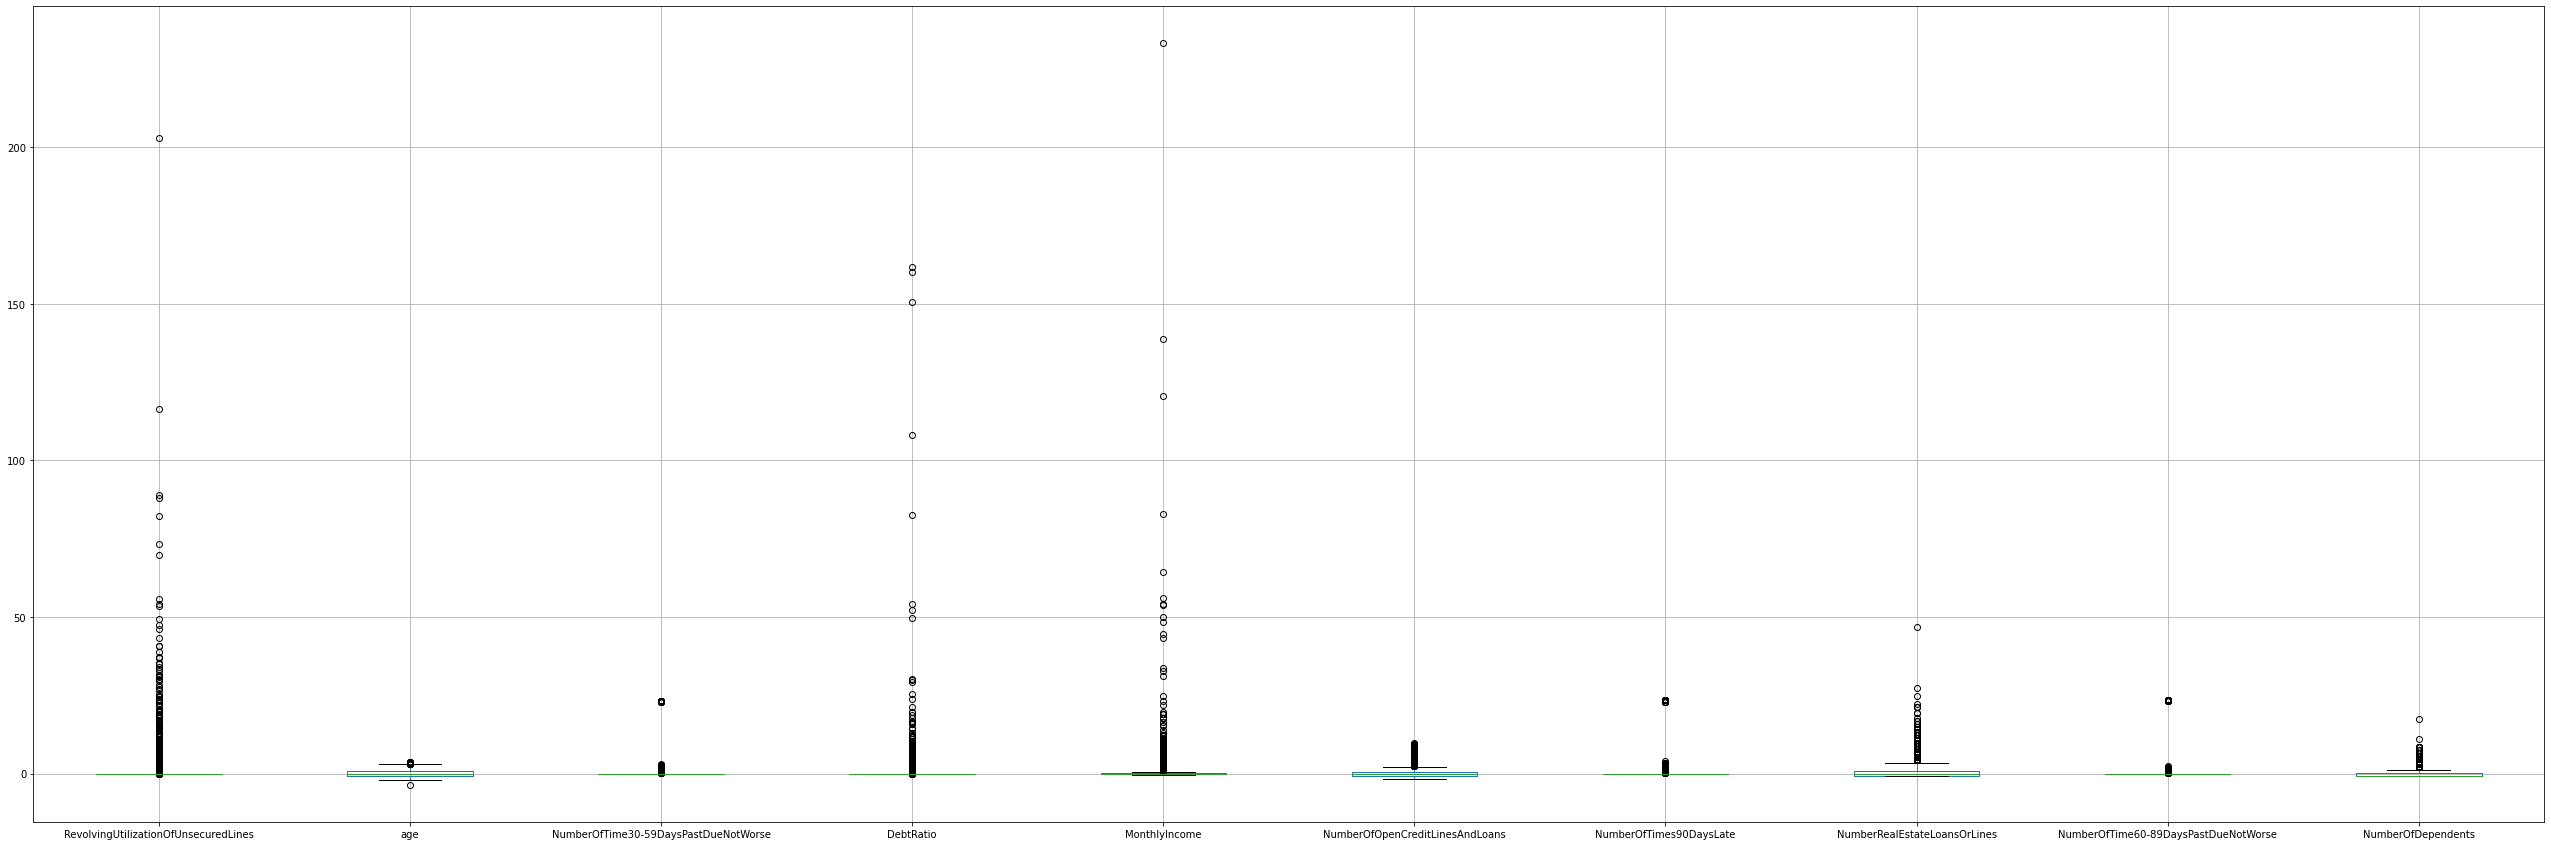

In [8]:
X_data.boxplot(figsize=(45,15))

<AxesSubplot:>

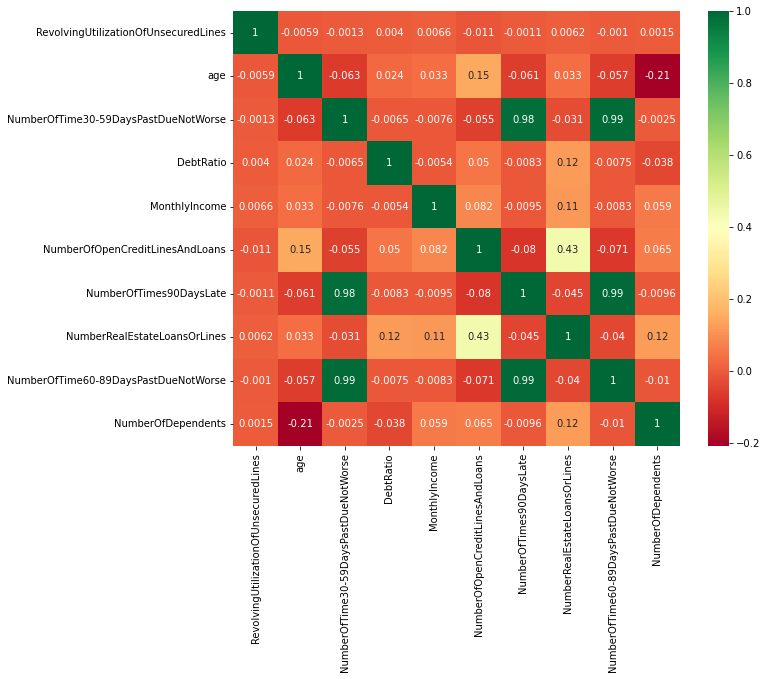

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(X_data.corr(),cmap='RdYlGn',annot = True,annot_kws={'size': 10},ax = ax)

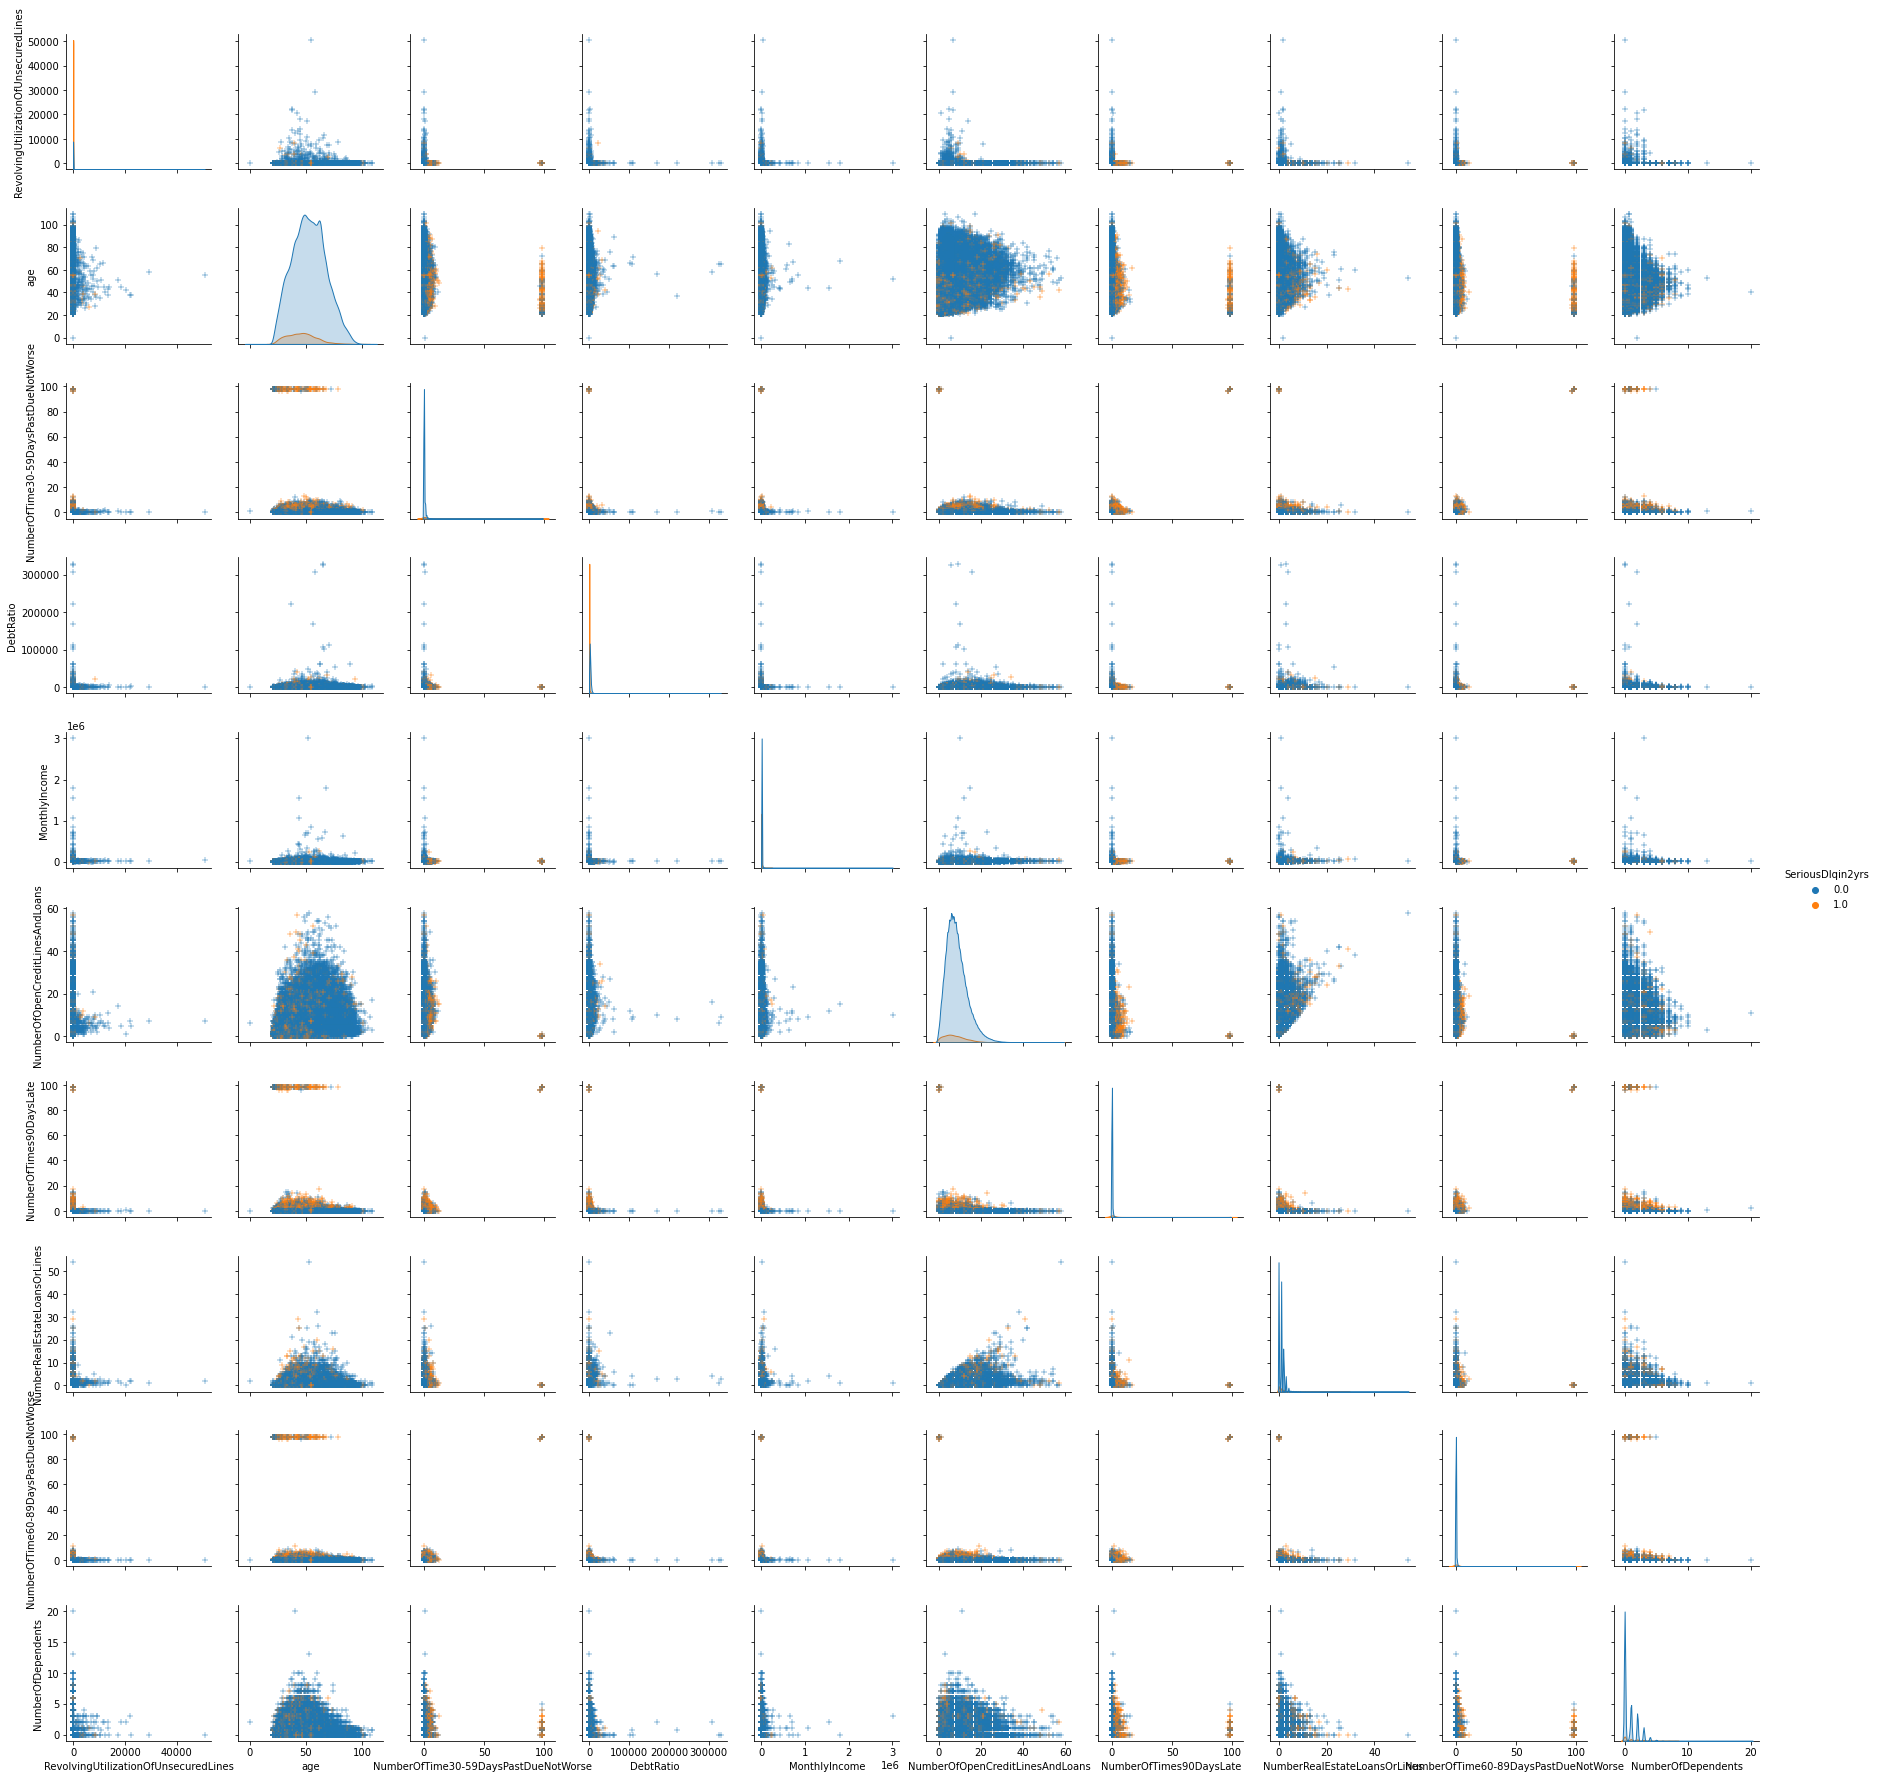

In [10]:
g = sns.pairplot(training_data, hue='SeriousDlqin2yrs', markers='+')

2 features have high correlation

In [11]:
new_data_X = X_data.drop(columns = ["NumberOfTime30-59DaysPastDueNotWorse","NumberOfTimes90DaysLate"],axis = 1)

<AxesSubplot:>

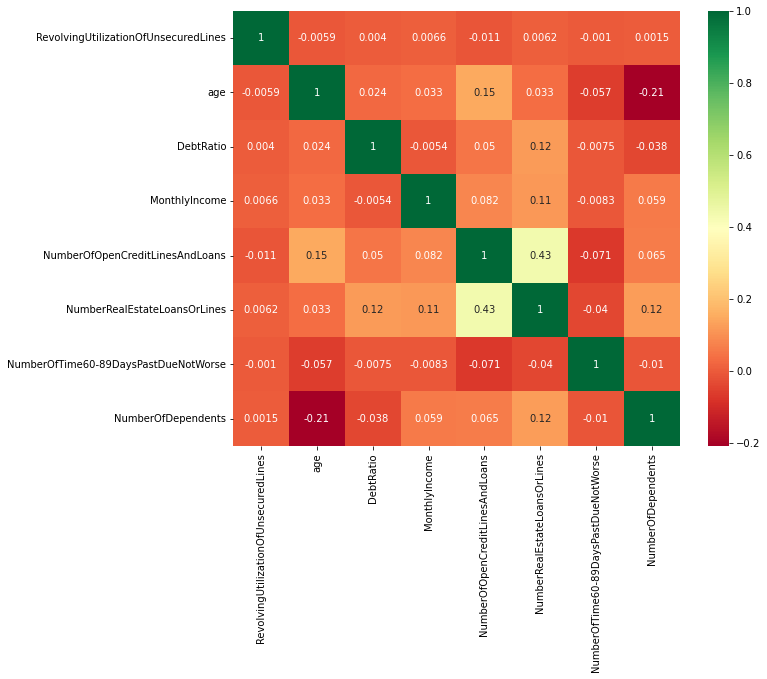

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(new_data_X.corr(),cmap='RdYlGn',annot = True,annot_kws={'size': 10},ax = ax)

<AxesSubplot:>

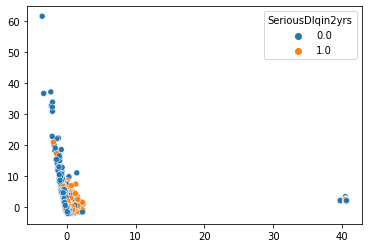

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X_data)
sns.scatterplot(x = X[:,0],y = X[:,1],hue = Y_data)